<a href="https://colab.research.google.com/github/shah-zeb-naveed/stock-index-prediction-deep-learning/blob/main/Stock_Index_Prediction_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib notebook

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
ls gdrive/'My Drive'/'Data Science'/'Data Science Projects'/'data'

sp500_stocks.csv


In [ ]:
# Import data
df = pd.read_csv('/content/gdrive/My Drive/Data Science/Data Science Projects/data/sp500_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,164.630,888.5500,49.850,219.11,39.43,274.080,31.780,81.03,124.89,58.820,77.725,330.73,72.430,37.470,119.385,167.740,33.7400,46.6450,126.8600,59.720,83.5400,29.020,28.370,63.4900,78.4600,89.90,33.3975,400.9400,...,18.6100,19.8901,70.69,36.26,124.66,164.62,47.0400,106.27,107.65,124.5901,51.6200,112.36,89.35,91.130,55.21,66.5900,120.1300,100.35,65.07,48.730,156.390,60.46,55.70,171.83,73.08,29.62,72.1000,52.160,20.34,34.00,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,164.680,887.1173,49.940,219.98,39.68,273.990,31.780,81.21,124.99,58.495,77.940,330.73,72.040,37.540,118.810,167.776,33.8800,46.6100,126.8600,59.830,83.9400,29.140,28.400,63.4600,78.6200,89.73,33.3950,400.4000,...,18.5100,19.8901,70.77,36.26,124.82,164.39,47.0400,106.27,107.65,124.5901,51.5800,112.36,89.35,91.210,55.12,66.3550,120.1300,100.03,65.04,48.752,157.190,59.93,55.81,171.54,72.95,29.64,72.1800,52.245,20.32,34.07,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,164.905,887.5110,49.860,219.39,39.60,274.275,31.765,81.21,125.00,58.470,77.815,330.73,72.055,37.610,118.830,168.000,33.9000,46.8850,126.9576,59.905,83.9400,29.150,28.375,63.5250,78.6311,89.24,33.4100,401.9850,...,18.4397,19.7900,70.62,36.19,124.82,165.30,46.9800,106.38,107.31,124.7100,51.4600,112.13,89.16,91.080,55.09,66.2417,120.3368,100.39,65.08,48.720,157.070,60.08,55.64,171.55,72.98,29.67,72.3192,52.200,20.26,34.11,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,164.760,886.2700,49.915,219.30,39.57,273.590,31.830,81.13,124.73,58.420,77.950,330.73,72.140,37.620,118.680,168.200,33.8499,46.7000,126.7000,59.700,83.7064,29.125,28.350,63.5300,78.7060,89.17,33.3350,401.5000,...,18.3700,19.7875,70.62,36.00,124.82,165.16,46.8097,106.33,107.49,124.4889,51.3800,112.01,89.06,91.015,55.21,66.1700,120.3100,100.39,64.95,48.695,156.945,60.39,55.64,171.26,73.09,29.79,72.4300,52.140,20.20,33.97,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,164.850,886.5800,49.915,219.18,39.55,273.540,31.830,81.12,124.83,58.600,78.050,330.73,72.215,37.625,118.935,168.040,33.8400,46.8562,126.8900,59.500,84.0000,29.140,28.410,63.6344,78.5850,88.95,33.4000,399.7704,...,18.3850,19.7324,70.78,36.01,124.82,165.24,47.0200,106.56,107.48,125.2449,51.4347,112.23,89.10,91.000,55.32,66.1800,120.3600,100.11,64.84,48.630,157.160,60.18,55.68,171.18,72.99,29.71,72.4800,52.140,20.22,34.00,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [ ]:
df.shape

(41266, 502)

In [ ]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,43.291988,12.624442,167.030297,968.747188,57.683091,238.598238,33.413552,272.957640,32.652696,89.325485,126.928020,64.227338,69.502897,348.719389,73.025271,39.607469,121.375413,165.457076,32.139336,51.284218,127.416660,65.928564,81.014205,26.051030,25.216388,62.413344,75.477313,107.713287,34.794506,432.201844,...,18.236453,19.777207,73.184257,38.363101,116.967866,181.850786,47.086121,107.603907,109.019095,113.124563,51.863284,119.265065,95.693963,98.311314,57.134291,65.903890,123.767195,89.828376,66.790525,46.574448,176.242257,62.352736,53.587272,181.971118,73.777928,30.102558,77.066819,55.411353,19.272765,33.248472,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,2.448582,1.172758,6.910730,38.966684,4.567420,12.824877,3.975551,13.763994,1.178095,5.746178,6.840787,2.634135,3.436516,25.257095,3.230921,1.225993,3.833343,10.024798,0.985571,2.377096,4.927756,4.133884,3.225397,1.976801,2.176216,2.624382,4.669540,9.865916,1.099296,17.370211,...,1.380061,1.437846,5.561782,1.159465,5.836284,9.608218,1.656671,2.717122,3.275806,5.662877,0.760720,3.242153,4.385522,5.335147,3.563356,1.859369,5.155408,9.226681,2.005502,1.767864,8.983449,1.540708,1.289050,9.512629,1.464602,0.927709,2.524082,2.424774,0.362162,0.908009,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,37.460000,9.871000,152.300000,884.670000,48.410000,208.560000,28.020000,244.280000,30.460000,80.000000,113.771600,58.210000,63.510000,312.660000,68.500000,37.025000,114.840000,150.000000,30.365000,46.101500,119.540000,57.530000,74.110000,22.110000,20.825000,56.090000,66.020000,87.940000,31.890000,396.940000,...,15.090000,16.125000,61.335000,35.460000,105.010000,164.390000,43.550000,101.080000,102.140000,100.735000,49.560000,111.290000,88.1

In [ ]:
df['DATE']

0        1491226200
1        1491226260
2        1491226320
3        1491226380
4        1491226440
            ...    
41261    1504209360
41262    1504209420
41263    1504209480
41264    1504209540
41265    1504209600
Name: DATE, Length: 41266, dtype: int64

In [ ]:
# Drop date variable
df = df.drop(['DATE'], 1)

# Dimensions of dataset
n = df.shape[0]
p = df.shape[1]

# Make data a numpy array
data = df.values
data

array([[2363.6101,   42.33  ,  143.68  , ...,   63.86  ,  122.    ,
          53.35  ],
       [2364.1001,   42.36  ,  143.7   , ...,   63.74  ,  121.77  ,
          53.35  ],
       [2362.6799,   42.31  ,  143.6901, ...,   63.75  ,  121.7   ,
          53.365 ],
       ...,
       [2470.03  ,   44.74  ,  164.01  , ...,   76.88  ,  114.31  ,
          62.685 ],
       [2471.49  ,   44.71  ,  163.88  , ...,   76.83  ,  114.23  ,
          62.6301],
       [2471.49  ,   44.74  ,  163.98  , ...,   76.81  ,  114.28  ,
          62.68  ]])

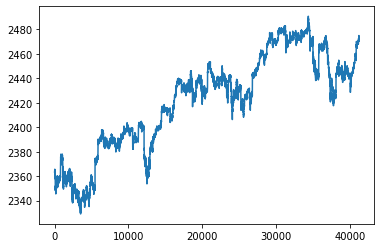

In [ ]:
plt.plot(df['SP500'])

Here, stock price is at a lead of 1 since we want to predict for the next minute.

In [ ]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n

data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

In [ ]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

In [ ]:
# Model architecture parameters
n_stocks = 500
n_neurons_1 = 1024
n_neurons_2 = 512
n_target = 1

learning_rate = 0.001

In [ ]:
#tf.reset_default_graph()

In [ ]:
# Initializers

weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=1)
bias_initializer = tf.zeros_initializer()

In [ ]:
# tf.get_variable_scope().reuse_variables()

In [ ]:
with tf.variable_scope('input', reuse=tf.AUTO_REUSE):
  X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])

In [ ]:
with tf.variable_scope('layer_1', reuse=tf.AUTO_REUSE):
  w1 = tf.get_variable('w1', shape=[n_stocks, n_neurons_1], initializer=weight_initializer)
  b1 = tf.get_variable('b1', shape=[n_neurons_1], initializer=bias_initializer)
  out1 = tf.nn.relu(tf.add(tf.matmul(X, w1), b1))

with tf.variable_scope('layer_2', reuse=tf.AUTO_REUSE):
  w2 = tf.get_variable('w2', shape=[n_neurons_1, n_neurons_2], initializer=weight_initializer)
  b2 = tf.get_variable('b2', shape=[n_neurons_2], initializer=bias_initializer)
  out2 = tf.nn.relu(tf.add(tf.matmul(out1, w2), b2))

with tf.variable_scope('output_layer', reuse=tf.AUTO_REUSE):
  w3 = tf.get_variable('w_out', shape=[n_neurons_2, n_target], initializer=weight_initializer)
  b3 = tf.get_variable('b_out', shape=[n_target], initializer=bias_initializer)

  # Output layer must be transposed
  prediction = tf.add(tf.matmul(out2, w3), b3)

In [ ]:
with tf.variable_scope('cost', reuse=tf.AUTO_REUSE):
  Y = tf.placeholder(dtype=tf.float32, shape=[None])
  sse = tf.squared_difference(prediction, Y)
  mse = tf.reduce_mean(sse)
  cost = mse

Tensor("cost/SquaredDifference:0", shape=(?, ?), dtype=float32)
shape:  (?, ?)


In [ ]:
with tf.variable_scope('train', reuse=tf.AUTO_REUSE):
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [ ]:
# Create a summary operation to log the progress of the network
with tf.variable_scope('logging', reuse=tf.AUTO_REUSE):
    tf.summary.scalar('current_cost', cost)
    #tf.summary.histogram('predicted_value', prediction)
    summary = tf.summary.merge_all()

In [ ]:
with tf.compat.v1.Session() as session:

  session.run(tf.global_variables_initializer())

  # Number of epochs and batch size
  epochs = 10
  batch_size = len(X_train)

  for epoch in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]
     
    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
      start = i * batch_size
      batch_x = X_train[start:start + batch_size]
      batch_y = y_train[start:start + batch_size]

      # Optimize network
      session.run(optimizer, feed_dict={X: batch_x, Y: batch_y})

      # Initialize log writers
      training_writer = tf.summary.FileWriter("./logs/training", session.graph)
      testing_writer = tf.summary.FileWriter("./logs/testing", session.graph)

      if epoch % 5 == 0:

        # Get the current accuracy scores by running the "cost" operation on the training and test data sets
        training_cost, training_summary = session.run([cost, summary], feed_dict={X: X_train, Y:y_train})
        testing_cost, testing_summary = session.run([cost, summary], feed_dict={X: X_test, Y:y_test})

        # Write Summary to logs
        training_writer.add_summary(training_summary, epoch)
        testing_writer.add_summary(testing_summary, epoch)

        # Print the current training status to the screen
        print("Epoch: {} - Training Cost: {}  Testing Cost: {}".format(epoch, training_cost, testing_cost))

  print("Training Complete.")

  # Make Predictions
  pred = session.run(prediction, feed_dict={X: X_test})

  final_training_cost = session.run(cost, feed_dict={X: X_train, Y: y_train})
  final_testing_cost = session.run(cost, feed_dict={X: X_test, Y: y_test})

  print("Final Training cost: {}".format(final_training_cost))
  print("Final Testing cost: {}".format(final_testing_cost))

Epoch: 0 - Training Cost: 14.627306938171387  Testing Cost: 16.369823455810547
Epoch: 5 - Training Cost: 0.3124235272407532  Testing Cost: 0.836651623249054
Training Complete.
Final Training cost: 0.29860949516296387
Final Testing cost: 0.03810066729784012


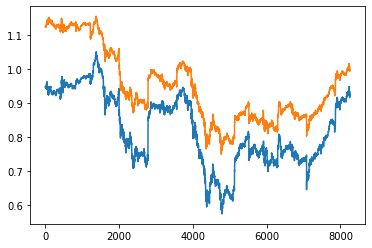

In [ ]:
# Prediction

# Setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(pred)
plt.show()